![](https://www.i9treinamentos.com/wp-content/uploads/elementor/thumbs/A-pandemia-de-Coronav%C3%ADrus-e-o-pandem%C3%B4nio-na-economia-omnnp6emx1qczr92vjwhtnoa1impqfrsl3zkw6c5g4.gif)

### Fonte dos dados: https://covid.saude.gov.br/
### Secretarias Estaduais de Saúde. Brasil, 2020

![](https://covid.saude.gov.br/assets/imgs/logo-app.png)

### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Base COVID

In [28]:
#Carregando os dados

df_covid = pd.read_excel("data/arquivo_geral.xlsx", sep=";")

In [29]:
#Removendo as features desnecessárias

df_covid = df_covid.drop(columns=['coduf', 'codmun', 'codRegiaoSaude', 'nomeRegiaoSaude', 'populacaoTCU2019'])

In [30]:
#Renomeando as colunas

df_covid = df_covid.rename(columns={'estado':'siglaEstado', 'Recuperadosnovos':'recuperadosNovos'})

In [31]:
#Trocando os valores nulos por zero

df_covid = df_covid.fillna(0)

In [32]:
#Convertendo a coluna 'recuperarNovos' de float para int

df_covid['recuperadosNovos'] = df_covid['recuperadosNovos'].values.astype(np.int64)

In [65]:
#Agrupar dados por 'data' e 'regiao', somando os valores da coluna 'casosAcumulado'

df_covid_data_regiao_casos = pd.DataFrame(df_covid.groupby(['data', 'regiao']).casosNovos.sum())

In [59]:
#Retornando apenas as linhas que contem a 'regiao' = 'Brasil'

df_covid_brasil = df_covid[df_covid['regiao'].str.contains("Brasil")]

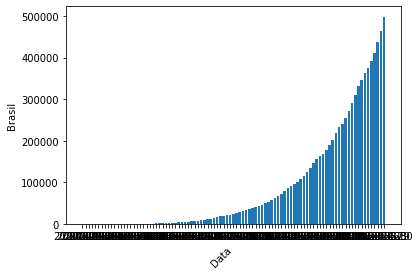

In [80]:
#Criação do gráfico de barras

plt.bar(df_covid_brasil['data'], df_covid_brasil['casosAcumulado'])
plt.xlabel('Data', rotation=45)
plt.ylabel('Brasil')
plt.show()

### Base Estados

In [6]:
#Carregando os dados

df_estados = pd.read_excel("data/estados_brasil.xlsx")

In [7]:
#Removendo as features desnecessárias

df_estados = df_estados.drop(columns=['IBGE', 'Qtd Mun', 'Sintaxe'])

In [8]:
#Renomeando as colunas

df_estados = df_estados.rename(columns={'Estado':'estado', 'UF':'siglaEstado', 'Região':'regiao'})

In [9]:
#Retirando a palavra 'Região' da coluna 'regiao'

df_estados['regiao'] = df_estados['regiao'].str.replace("Região ", "")